<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

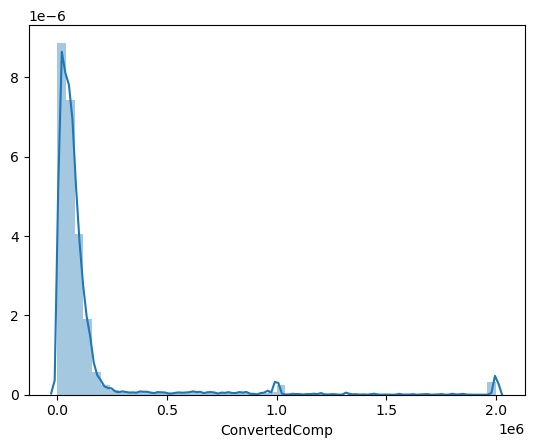

In [15]:
# your code goes here

import seaborn as sns

df = df.dropna(subset=['ConvertedComp'])
sns.distplot(df['ConvertedComp'], kde=True)


Plot the histogram for the column `ConvertedComp`.


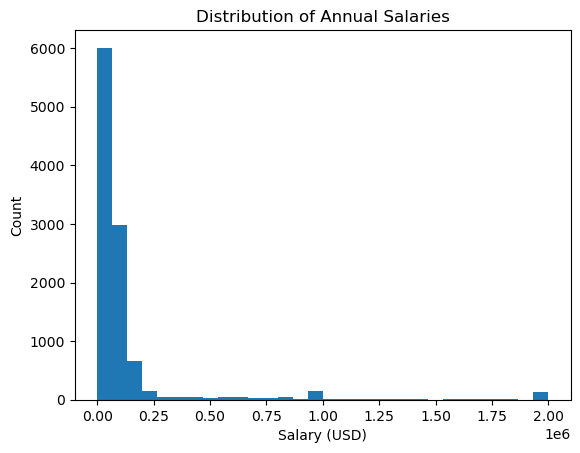

In [5]:
# your code goes here
plt.hist(df['ConvertedComp'], bins=30)

# Add labels and title
plt.xlabel('Salary (USD)')
plt.ylabel('Count')
plt.title('Distribution of Annual Salaries')

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [74]:
# your code goes here
df['ConvertedComp'].median()
#df['Age'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [24]:
# your code goes here
df.columns
df['Gender'].value_counts()

Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [26]:

# your code goes here
import numpy as np
women_df = df[df['Gender'] == 'Woman']

# Calculate the median of ConvertedComp for women responders
np.median(women_df['ConvertedComp'])

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [38]:
# your code goes here
df['ConvertedComp'].describe().astype("int")

count      10582
mean      131596
std       294786
min            0
25%        26868
50%        57745
75%       100000
max      2000000
Name: ConvertedComp, dtype: int64

Plot a histogram of the column `Age`.


(array([3.000e+01, 3.580e+02, 1.541e+03, 2.020e+03, 1.382e+03, 1.566e+03,
        1.177e+03, 8.290e+02, 4.000e+02, 3.730e+02, 2.270e+02, 1.880e+02,
        8.300e+01, 9.100e+01, 3.600e+01, 2.400e+01, 2.200e+01, 2.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16.        , 18.76666667, 21.53333333, 24.3       , 27.06666667,
        29.83333333, 32.6       , 35.36666667, 38.13333333, 40.9       ,
        43.66666667, 46.43333333, 49.2       , 51.96666667, 54.73333333,
        57.5       , 60.26666667, 63.03333333, 65.8       , 68.56666667,
        71.33333333, 74.1       , 76.86666667, 79.63333333, 82.4       ,
        85.16666667, 87.93333333, 90.7       , 93.46666667, 96.23333333,
        99.        ]),
 <BarContainer object of 30 artists>)

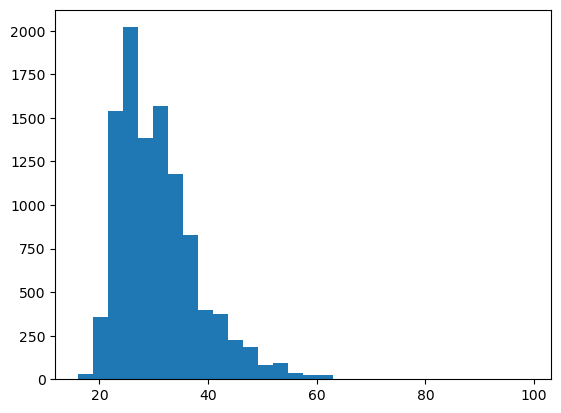

In [30]:
# your code goes here
plt.hist(df['Age'], bins=30)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

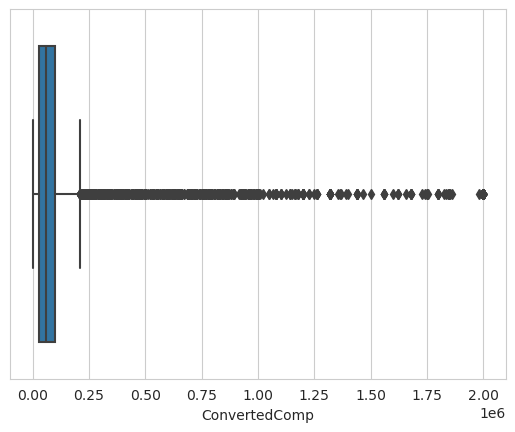

In [117]:
# your code goes here
sns.set_style("whitegrid")  # set the style of the plot

sns.boxplot(x='ConvertedComp', data=df)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [86]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [109]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)
df['ConvertedComp'].median ()

Upper bound: 209698.0
Lower bound: -82830.0


57745.0

Identify how many outliers are there in the `ConvertedComp` column.


In [100]:
# your code goes here
from scipy import stats

df['zscore']=stats.zscore(df["ConvertedComp"])
#outlier=np.where(score>3)
outliers = df.loc[df['zscore'].abs()>3]
# Count number of outliers
outliers["ConvertedComp"]
#df['ConvertedComp'].median()

13       1100000.0
46       2000000.0
76       2000000.0
203      2000000.0
210      2000000.0
           ...    
11222    2000000.0
11247    2000000.0
11249    1680000.0
11263    2000000.0
11276    2000000.0
Name: ConvertedComp, Length: 240, dtype: float64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [120]:
import pandas as pd
from scipy import stats

# Calculate z-scores for ConvertedComp column
z_scores = stats.zscore(df['ConvertedComp'])

# Identify outliers
outliers = df[(z_scores < -3) | (z_scores > 3)]

# Remove outliers and create new dataframe
new_df = df[(z_scores > -3) & (z_scores < 3)]

# Calculate mean and median for ConvertedComp column in the new dataframe
mean = new_df['ConvertedComp'].mean()
median = new_df['ConvertedComp'].median()

print("Mean ConvertedComp in new dataframe:", mean)
print("Median ConvertedComp in new dataframe:", median)


Mean ConvertedComp in new dataframe: 94163.72674531039
Median ConvertedComp in new dataframe: 57000.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [122]:
corr_matrix = df.corr(method='pearson')['Age']
print(corr_matrix)

Respondent       0.002394
CompTotal        0.006949
ConvertedComp    0.105386
WorkWeekHrs      0.031592
CodeRevHrs      -0.015742
Age              1.000000
zscore           0.105386
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
